# Visualizing Downscaled Climate Projections in the U.S.
## Haley Crim and Rey Lautenschlager

### Our question
How do different levels of global warming change local climates?

### Our data
**NCA5 Atlas Data**
* Projections at 1.5, 2, 3, and 4 C of global warming - NOT time bound
* Statistically downscaled CMIP6 projections (LOCA2 and STAR protocols), averaged for whole counties
* Data for all counties in the contiguous U.S. and Alaska, Hawaii, and Puerto Rico as whole areas _for some variables_
* Taken offline and reposted on ESRI website on Monday

## Loading packages

In [151]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import matplotlib.colors as colors

## Loading datasets for 1.5, 2, 3, and 4 degrees warming and making "county_and_state" column

In [4]:
file_path_1 = "NCA_Atlas_Figures_Beta_Counties_view_-7947877000937677562 (1).csv"
df_1 = pd.read_csv(file_path_1)
df_1.head()

,OBJECTID,County name,State name,State abbreviation,FIPS,Precip Above 99th pctl,Precip 1-day max,Precip 5-year max,Temperature average,Temp max 1-day,...,Temp Days 95 F,Temp mean summer,Temp Days Min 70 F,Temp Days Min 0 F,Temp Days Min 32 F,Temp min summer,Precip Annual GWL1,Precip Days 99 pctl GWL1,Shape__Area,Shape__Length
0,1,Autauga County,Alabama,AL,1001,8.866368,1.204632,0.560895,1.732316,1.543474,...,14.359526,1.604421,22.678737,-0.039947,-8.215921,1.774947,2.231684,11.870172,2.208626e+09,2.495680e+05
1,2,Baldwin County,Alabama,AL,1003,10.447559,3.454147,1.104216,1.633755,1.526716,...,14.127980,1.508863,19.807863,-0.008627,-5.261471,1.667588,3.200307,11.634376,5.743992e+09,1.089822e+06
2,3,Barbour County,Alabama,AL,1005,10.930474,0.800702,0.499965,1.649667,1.629789,...,13.983421,1.571404,23.813614,-0.017614,-6.758772,1.625246,2.796249,16.953608,3.257820e+09,3.193028e+05
3,4,Bibb County,Alabama,AL,1007,10.956795,2.631909,1.330318,1.789705,1.623523,...,13.283023,1.684205,22.352250,-0.083273,-9.176136,1.856455,1.619284,14.511721,2.312191e+09,2.279085e+05
4,5,Blount County,Alabama,AL,1009,18.316114,6.689886,6.570682,1.757045,1.530205,...,9.981773,1.639023,18.284318,-0.132205,-9.861114,1.868750,3.069511,23.057712,2.456981e+09,2.913548e+05


In [5]:
df_1['county_and_state'] = df_1['County name'] + ', ' + df_1['State abbreviation']
df_1

,OBJECTID,County name,State name,State abbreviation,FIPS,Precip Above 99th pctl,Precip 1-day max,Precip 5-year max,Temperature average,Temp max 1-day,...,Temp mean summer,Temp Days Min 70 F,Temp Days Min 0 F,Temp Days Min 32 F,Temp min summer,Precip Annual GWL1,Precip Days 99 pctl GWL1,Shape__Area,Shape__Length,county_and_state
0,1,Autauga County,Alabama,AL,1001,8.866368,1.204632,0.560895,1.732316,1.543474,...,1.604421,22.678737,-0.039947,-8.215921,1.774947,2.231684,11.870172,2.208626e+09,2.495680e+05,"Autauga County, AL"
1,2,Baldwin County,Alabama,AL,1003,10.447559,3.454147,1.104216,1.633755,1.526716,...,1.508863,19.807863,-0.008627,-5.261471,1.667588,3.200307,11.634376,5.743992e+09,1.089822e+06,"Baldwin County, AL"
2,3,Barbour County,Alabama,AL,1005,10.930474,0.800702,0.499965,1.649667,1.629789,...,1.571404,23.813614,-0.017614,-6.758772,1.625246,2.796249,16.953608,3.257820e+09,3.193028e+05,"Barbour County, AL"
3,4,Bibb County,Alabama,AL,1007,10.956795,2.631909,1.330318,1.789705,1.623523,...,1.684205,22.352250,-0.083273,-9.176136,1.856455,1.619284,14.511721,2.312191e+09,2.279085e+05,"Bibb County, AL"
4,5,Blount County,Alabama,AL,1009,18.316114,6.689886,6.570682,1.757045,1.530205,...,1.639023,18.284318,-0.132205,-9.861114,1.868750,3.069511,23.057712,2.456981e+09,2.913548e+05,"Blount County, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3106,3107,Washakie County,Wyoming,WY,56043,17.864115,6.655069,8.193466,2.103356,2.002747,...,2.147466,0.158741,-5.406983,-11.806500,2.097448,5.085914,16.041836,1.119306e+10,5.302211e+05,"Washakie County, WY"
3107,3108,Weston County,Wyoming,WY,56045,20.280563,5.863631,8.519034,2.067239,2.078767,...,2.164869,0.597778,-4.788625,-10.939795,2.158937,4.700654,18.228163,1.195226e+10,4.377290e+05,"Weston County, WY"
3108,3109,NaN,Puerto Rico,PR,72,4.800000,0.700000,5.800000,0.950000,NaN,...,NaN,28.700000,NaN,NaN,NaN,NaN,NaN,9.971219e+09,1.220207e+06,NaN
3109,3110,NaN,Alaska,AK,2,22.300000,6.500000,5.900000,2.100000,NaN,...,NaN,NaN,-7.449000,-12.600000,NaN,NaN,NaN,8.202575e+12,8.103753e+07,NaN


In [21]:
#Removing cities in Virginia that are not in counties because they have incorrect data
df_1 = df_1[~df_1['County name'].str.contains('city', na=False)]

#Checking to see if the cities are removed - they were previously between York VA and Adams WA counties
df_1.iloc[2875:2877]

,OBJECTID,County name,State name,State abbreviation,FIPS,Precip Above 99th pctl,Precip 1-day max,Precip 5-year max,Temperature average,Temp max 1-day,...,Temp mean summer,Temp Days Min 70 F,Temp Days Min 0 F,Temp Days Min 32 F,Temp min summer,Precip Annual GWL1,Precip Days 99 pctl GWL1,Shape__Area,Shape__Length,county_and_state
2880,2881,York County,Virginia,VA,51199,5.600625,2.578875,1.221125,1.915375,1.546625,...,1.809000,17.020500,-0.045000,-12.598250,1.894375,2.625594,14.831332,4.394587e+08,397290.097421,"York County, VA"
2919,2920,Adams County,Washington,WA,53001,19.968808,4.403013,3.983715,2.062079,2.658391,...,2.654457,0.699238,-1.166344,-18.319815,2.095954,3.325035,28.583626,1.073455e+10,485709.543237,"Adams County, WA"


In [43]:
# Doing the same for the other datasets for 2, 3, and 4 degree C warming
file_path_2 = "NCA_Atlas_GWL_2C_-2110005955286935887.csv"
df_2 = pd.read_csv(file_path_2)
df_2['county_and_state'] = df_2['County name'] + ', ' + df_2['State abbreviation']
df_2 = df_2[~df_2['County name'].str.contains('city', na=False)]

file_path_3 = "NCA_Atlas_Global_Warming_Level_5_deg_F_7660615008925248363.csv"
df_3 = pd.read_csv(file_path_3)
df_3['county_and_state'] = df_3['County name'] + ', ' + df_3['State abbreviation']
df_3 = df_3[~df_3['County name'].str.contains('city', na=False)]

file_path_4 = "NCA_Atlas_Global_Warming_Level_7_deg_F_378192723792765213.csv"
df_4 = pd.read_csv(file_path_4)
df_4['county_and_state'] = df_4['County name'] + ', ' + df_4['State abbreviation']
df_4 = df_4[~df_4['County name'].str.contains('city', na=False)]

# Calculating average annual temperature change across the U.S. for each scenario

In [34]:
df_1_mean_temp = df_1['Temperature average'].mean()
print(f"Mean temperature change at 2.7 degrees F: {df_1_mean_temp} F")

Mean temperature change at 2.7 degrees F: 2.0630597367292194 F


In [35]:
df_2_mean_temp = df_2['Temperature average'].mean()
print(f"Mean temperature change at 3.6 degrees F: {df_2_mean_temp} F")

Mean temperature change at 3.6 degrees F: 3.3485545517074806 F


In [36]:
df_3_mean_temp = df_3['Temperature average'].mean()
print(f"Mean temperature change at 5.4 degrees F: {df_3_mean_temp} F")

Mean temperature change at 5.4 degrees F: 5.790901846107021 F


In [37]:
df_4_mean_temp = df_4['Temperature average'].mean()
print(f"Mean temperature change at 7.2 degrees F: {df_4_mean_temp} F")

Mean temperature change at 7.2 degrees F: 7.488466818456745 F


In [38]:
#Creating a dataframe
data = {'Global warming in F': [2.7, 3.6, 5.4, 7.2],
        'Mean US warming in F': [2.1, 3.3, 5.8, 7.5],
       }
temp = pd.DataFrame(data, index=['1.5C', '2C', '3C', '4C'])
temp

,Global warming in F,Mean US warming in F
1.5C,2.7,2.1
2C,3.6,3.3
3C,5.4,5.8
4C,7.2,7.5


### Average annual temperature change for each scenario

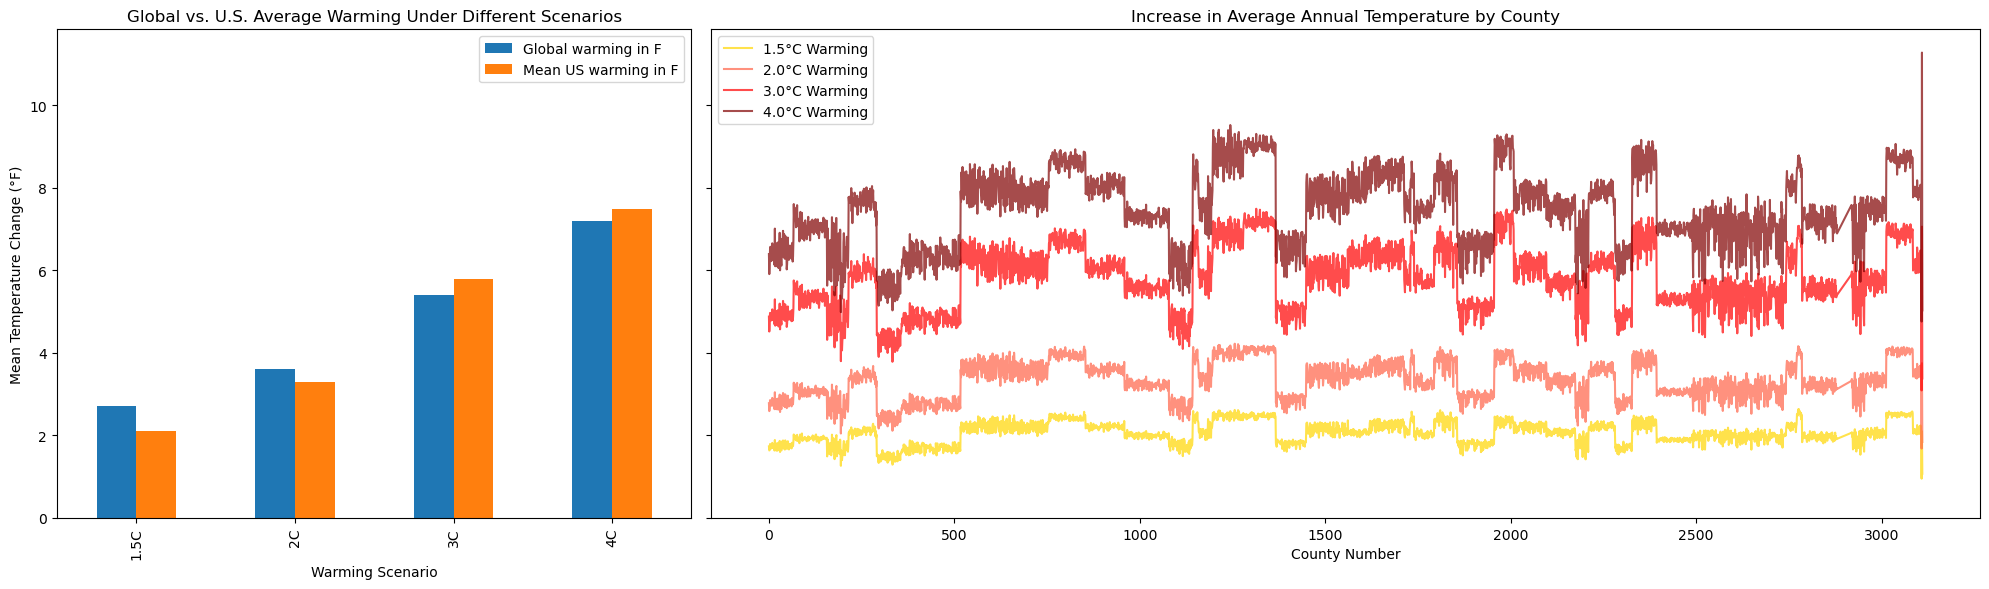

In [158]:
# Create figure and two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 2]}, sharey=True)

# First Plot: Bar chart of global vs. U.S. warming at different scenarios
ax1 = axes[0]
temp.plot(kind='bar', ax=ax1)

ax1.set_title('Global vs. U.S. Average Warming Under Different Scenarios')
ax1.set_xlabel('Warming Scenario')
ax1.set_ylabel('Mean Temperature Change (°F)')

# Second Plot: Line chart of county-level temperature change at different scenarios
ax2 = axes[1]
ax2.plot(df_1['Temperature average'], label='1.5°C Warming', color='gold', alpha=0.7)
ax2.plot(df_2['Temperature average'], label='2.0°C Warming', color='tomato', alpha=0.7)
ax2.plot(df_3['Temperature average'], label='3.0°C Warming', color='red', alpha=0.7)
ax2.plot(df_4['Temperature average'], label='4.0°C Warming', color='maroon', alpha=0.7)

ax2.set_title('Increase in Average Annual Temperature by County')
ax2.set_xlabel('County Number')
ax2.set_ylabel('Average Annual Temperature Increase (°F)')
ax2.legend()

plt.tight_layout()

plt.show()

## Finding the 30 counties that will have largest change in annual temperature by scenario

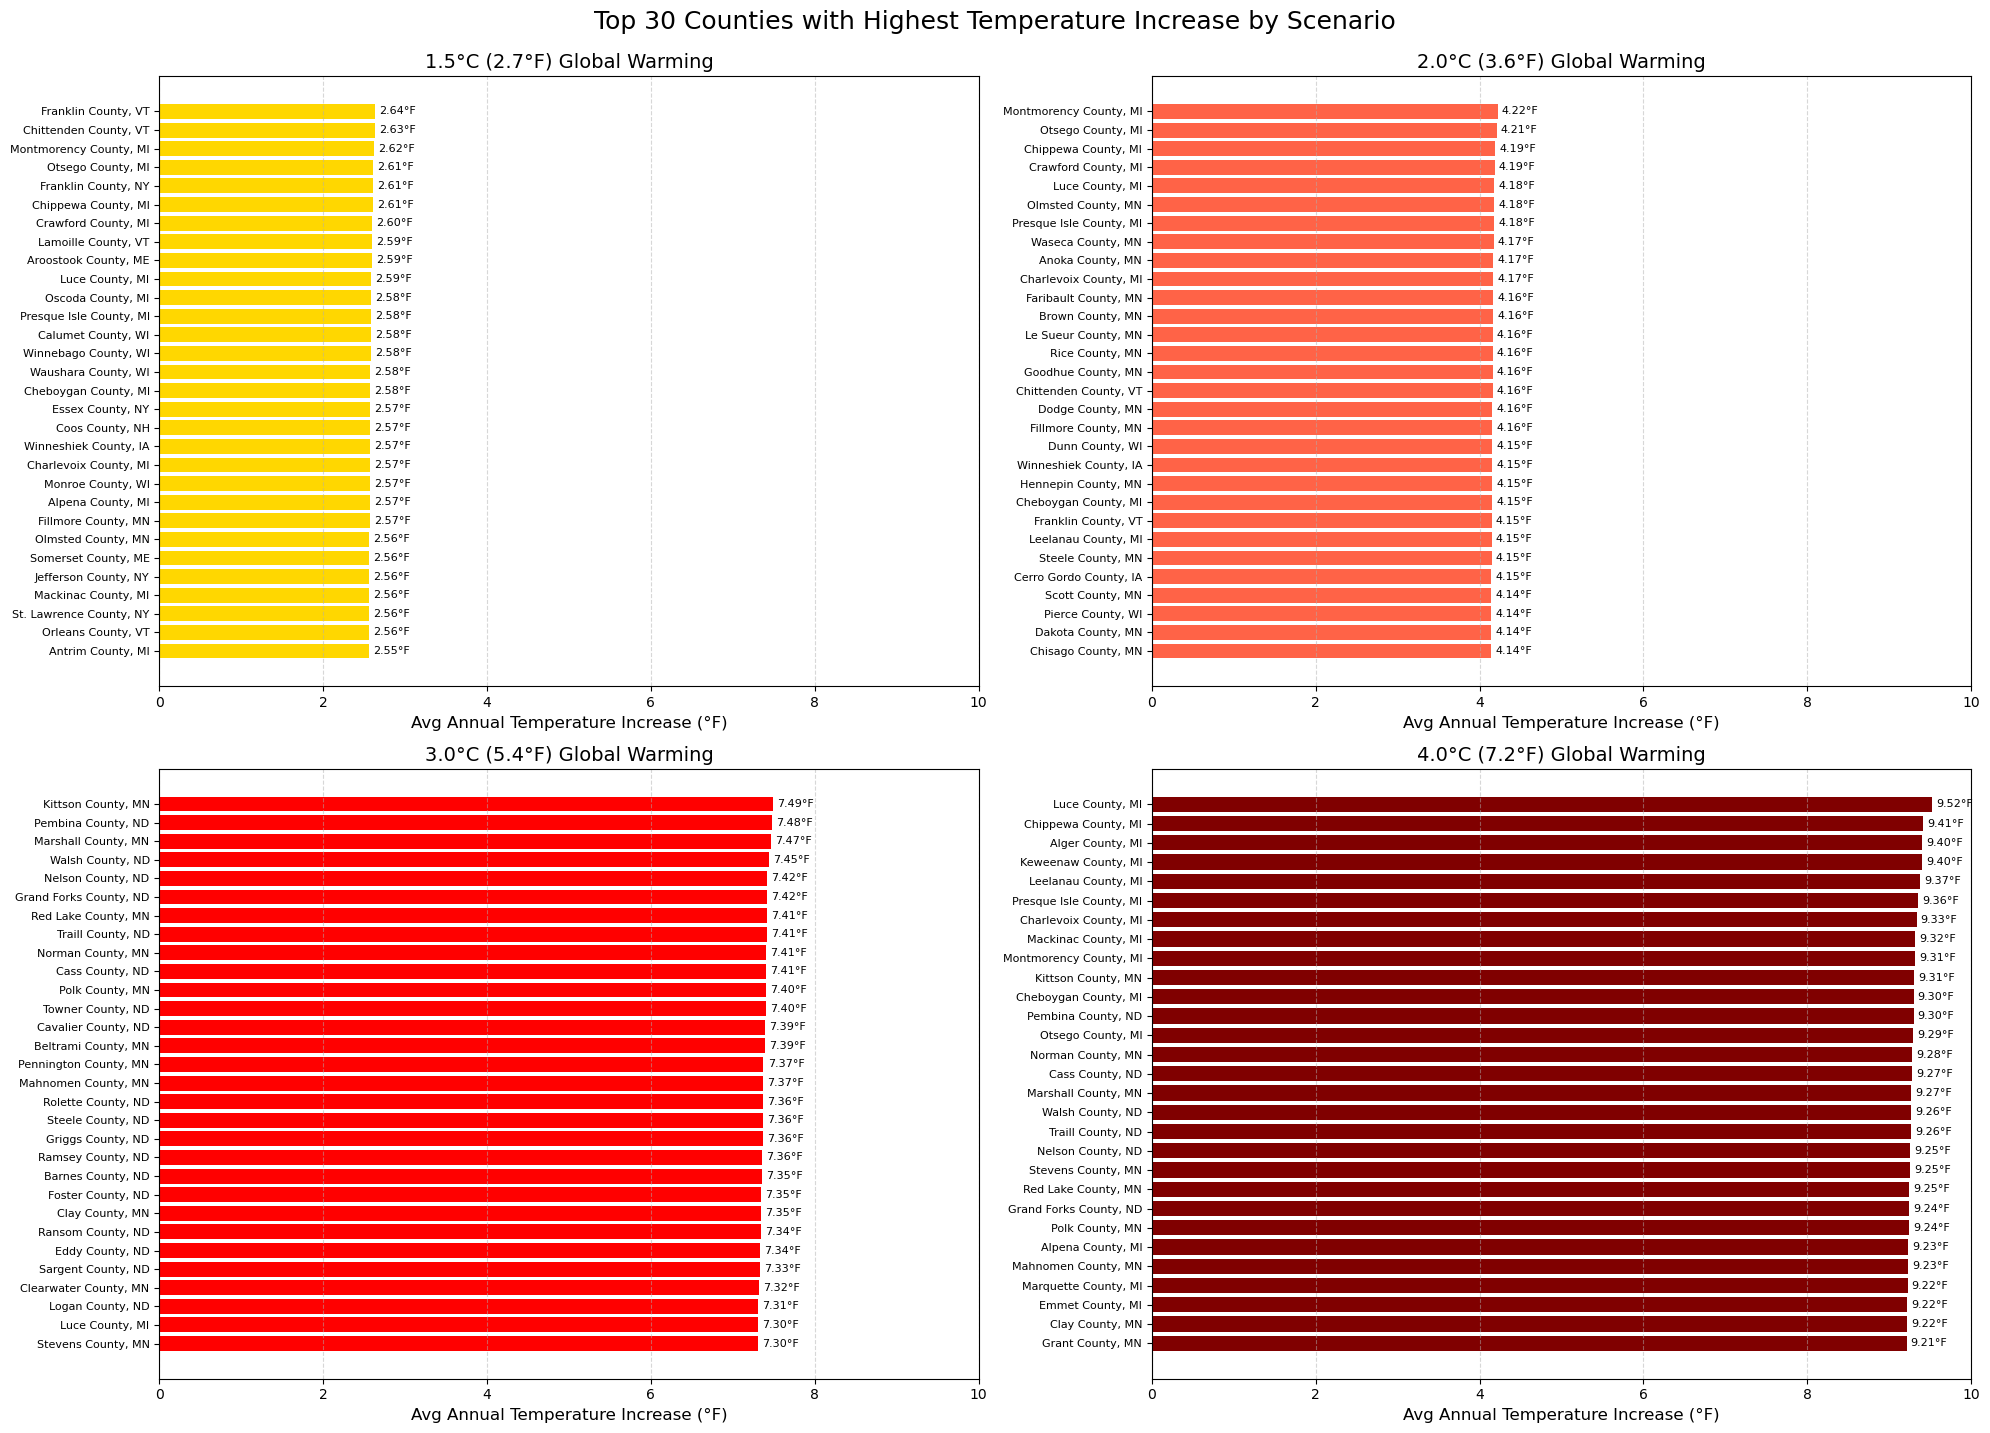

In [143]:
# Prepare data for each scenario
dfs = [df_1, df_2, df_3, df_4]
titles = ['1.5°C (2.7°F) Global Warming', '2.0°C (3.6°F) Global Warming', '3.0°C (5.4°F) Global Warming', '4.0°C (7.2°F) Global Warming']
colors = ['gold', 'tomato', 'red', 'maroon']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten() 

for i, (df, title, color) in enumerate(zip(dfs, titles, colors)):
    # Get top 30 counties and show them in order of showing at the top
    df_top30 = df.nlargest(30, 'Temperature average').dropna()[["Temperature average", "county_and_state"]]
    # Display them so the largest are at the top
    df_top30 = df_top30.iloc[::-1]
    
    # Create plots
    ax = axes[i]
    bars = ax.barh(df_top30['county_and_state'], df_top30['Temperature average'], color=color)

    # Add bar labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
                f'{width:.2f}°F', va='center', fontsize=8)

    # Set up chart
    ax.set_xlim(0, 10)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Avg Annual Temperature Increase (°F)', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', labelsize=8)

# Layout
plt.tight_layout()
plt.suptitle('Top 30 Counties with Highest Temperature Increase by Scenario', fontsize=18, y=1.02)

plt.show()

### Mapping county-level change in average temperature at 2°C global warming

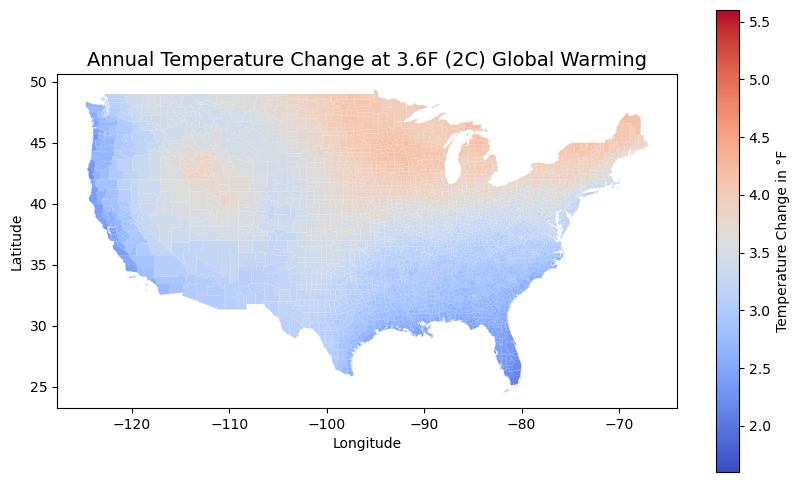

In [162]:
# Load geoJSON file
two = gpd.read_file("2C.geojson")

# Bound for contiguous U.S.
us_bounds = {
    'minx': -125,
    'maxx': -66.5,
    'miny': 24,
    'maxy': 50
}
two_us = two.cx[us_bounds['minx']:us_bounds['maxx'], us_bounds['miny']:us_bounds['maxy']]

# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
two_us.plot(column='tavg_GWL2',
         cmap='coolwarm',
         norm=colors.Normalize(vmin=1.6, vmax=5.6),
         ax=ax)

sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=colors.Normalize(vmin=1.6, vmax=5.6))
sm._A = [] 
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Temperature Change in °F')

ax.set_title("Annual Temperature Change at 3.6F (2C) Global Warming", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# Change in annual precipitation for each scenario

In [23]:
df_1_mean_precip = df_1['Precip Annual GWL1'].mean()
print(f"Mean percent change in precipitation at 2.7 °F: {df_1_mean_precip}")

Mean percent change in precipitation at 2.7 °F: 2.567082813525189


In [23]:
df_2_mean_precip = df_2['Precip Annual GWL2'].mean()
print(f"Mean percent change in precipitation at 3.6 °F: {df_2_mean_precip}")

Mean percent change in precipitation at 3.6 °F: 2.5116559991090837


In [24]:
df_3_mean_precip = df_3['Precip Annual GWL3'].mean()
print(f"Mean percent change in precipitation at 5.4 °F: {df_3_mean_precip}")

Mean percent change in precipitation at 5.4 °F: 4.776370951539888


In [25]:
df_4_mean_precip = df_4['Precip Annual GWL4'].mean()
print(f"Mean percent change in precipitation at 7.2 °F: {df_4_mean_precip}")

Mean percent change in precipitation at 7.2 °F: 6.397775656255075


In [88]:
data = {'Percent precipitation change': [2.6, 2.5, 4.7, 6.4],
       }
precip = pd.DataFrame(data, index=['1.5C', '2C', '3C', '4C'])
precip

,Percent precipitation change
1.5C,2.6
2C,2.5
3C,4.7
4C,6.4


### Change in average annual precipitation for each scenario

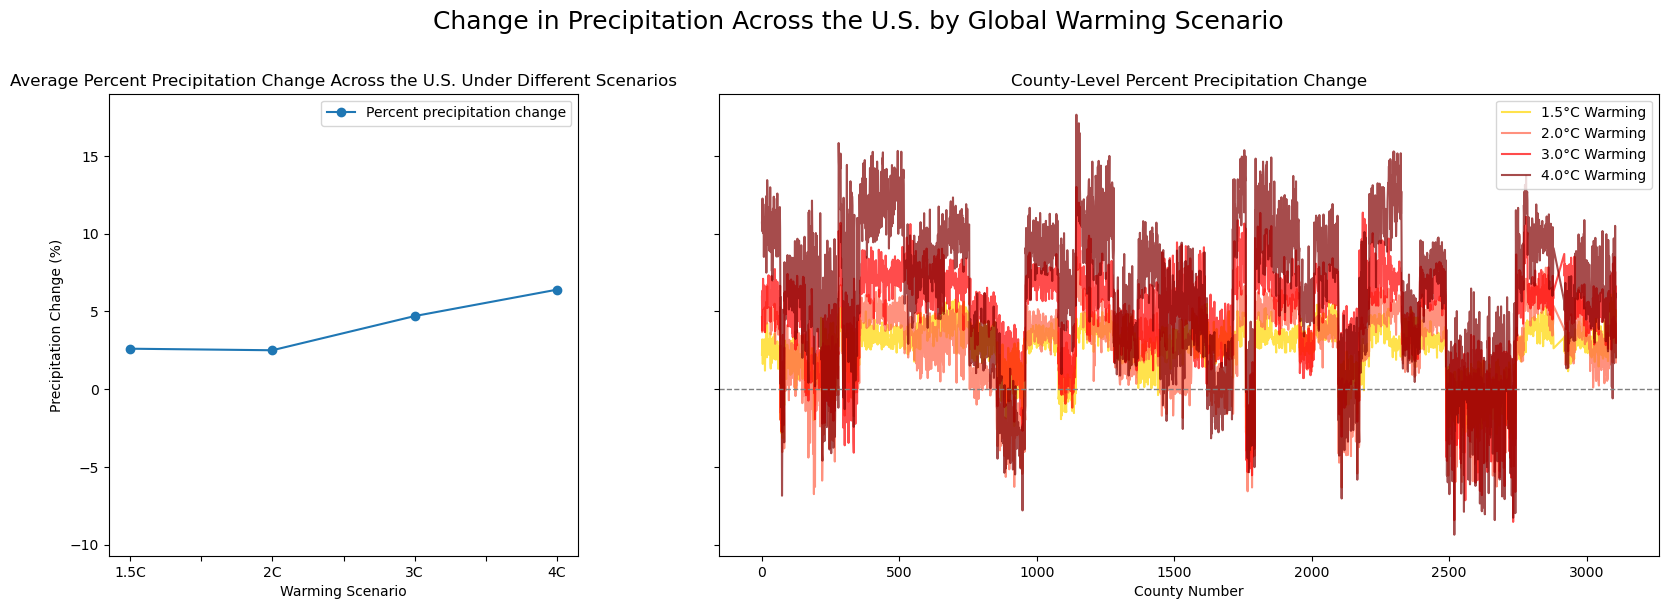

In [161]:
# Create a figure
fig, axes = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 2]}, sharey=True)

# First Plot: Line plot across scenarios
ax1 = axes[0]
precip.plot(kind='line', marker='o', ax=ax1)

ax1.set_title('Average Percent Precipitation Change Across the U.S. Under Different Scenarios')
ax1.set_xlabel('Warming Scenario')
ax1.set_ylabel('Precipitation Change (%)')

# Second Plot: County-level data line plot
ax2 = axes[1]
ax2.plot(df_1['Precip Annual GWL1'], label='1.5°C Warming', color='gold', alpha=0.7)
ax2.plot(df_2['Precip Annual GWL2'], label='2.0°C Warming', color='tomato', alpha=0.7)
ax2.plot(df_3['Precip Annual GWL3'], label='3.0°C Warming', color='red', alpha=0.7)
ax2.plot(df_4['Precip Annual GWL4'], label='4.0°C Warming', color='maroon', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

ax2.set_title('County-Level Percent Precipitation Change')
ax2.set_xlabel('County Number')
ax2.legend()

plt.suptitle('Change in Precipitation Across the U.S. by Global Warming Scenario', fontsize=18, y=1.02)

plt.show()

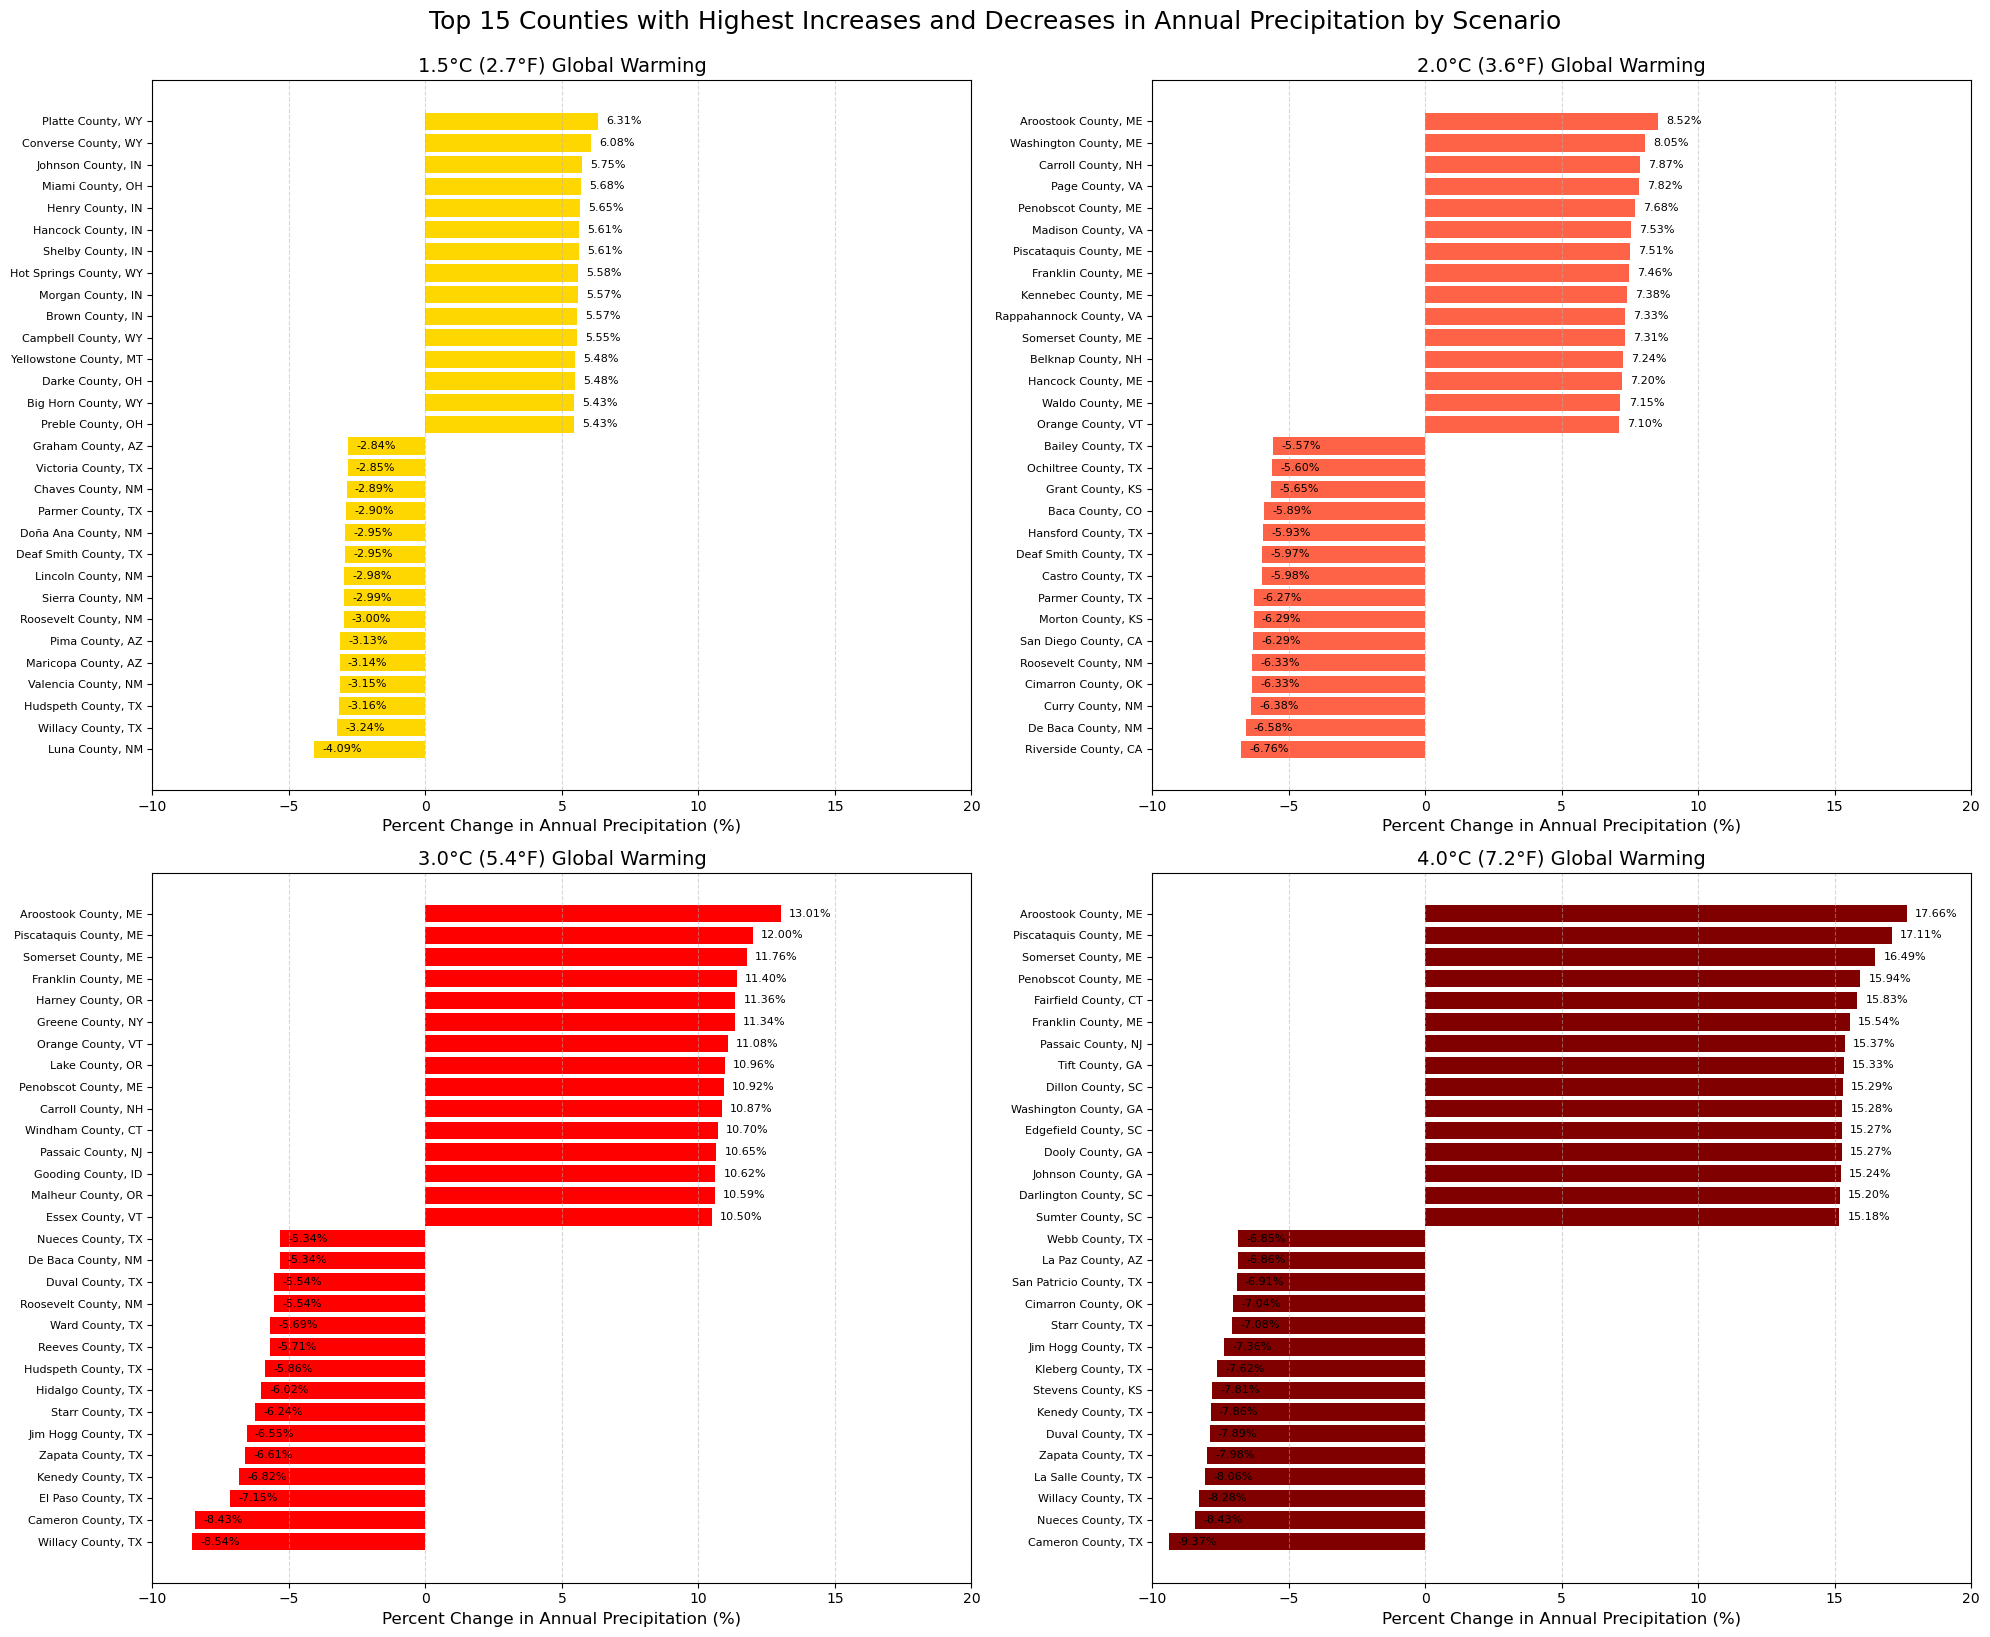

In [145]:
# Data and configuration
dfs = [df_1, df_2, df_3, df_4]
precip_columns = ['Precip Annual GWL1', 'Precip Annual GWL2', 'Precip Annual GWL3', 'Precip Annual GWL4']
titles = ['1.5°C (2.7°F) Global Warming', '2.0°C (3.6°F) Global Warming', '3.0°C (5.4°F) Global Warming', '4.0°C (7.2°F) Global Warming']
colors = ['gold', 'tomato', 'red', 'maroon']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for i, (df, column, title, color) in enumerate(zip(dfs, precip_columns, titles, colors)):
    # Drop missing data
    df_valid = df.dropna(subset=[column])[["county_and_state", column]]

    # Get top 15 and bottom 15 rows and connect them in a dataframe
    top15 = df_valid.nlargest(15, column)
    bottom15 = df_valid.nsmallest(15, column)
    df_combined = pd.concat([bottom15, top15])

    # Sort so the biggest increases are at top
    df_sorted = df_combined.sort_values(by=column, ascending=True)

    # Plot
    ax = axes[i]
    bars = ax.barh(df_sorted['county_and_state'], df_sorted[column], color=color)

    # Add bar labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
                f'{width:.2f}%', va='center', fontsize=8)

    # Formatting
    ax.set_xlim(-10, 20)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Percent Change in Annual Precipitation (%)', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', labelsize=8)

# Layout and title
plt.tight_layout()
plt.suptitle('Top 15 Counties with Highest Increases and Decreases in Annual Precipitation by Scenario', fontsize=18, y=1.02)

plt.show()

### Mapping change in precipitation by county at 2°C global warming

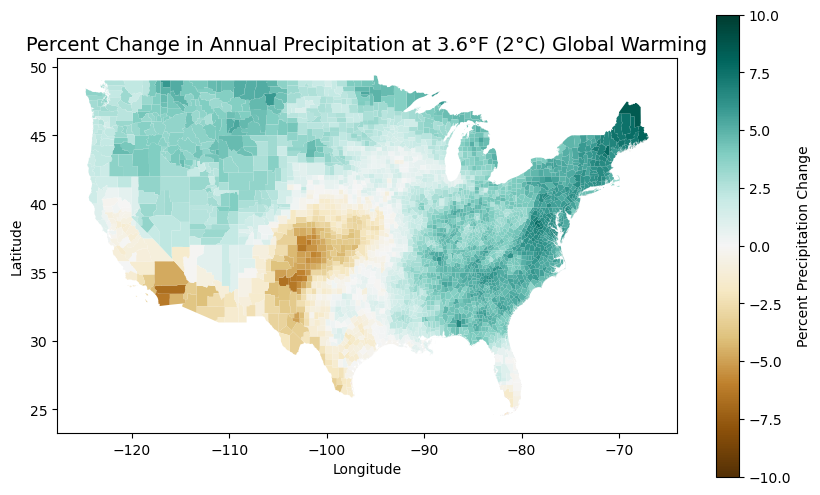

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot
two.plot(column='pr_annual_GWL2',
         cmap='BrBG',
         ax=ax,
         vmin=-10, vmax=10)

# Create colorbar with a scale that matches the map
sm = plt.cm.ScalarMappable(cmap='BrBG', norm=colors.Normalize(vmin=-10, vmax=10))
sm._A = []  
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Percent Precipitation Change')

# Set labels
ax.set_title("Percent Change in Annual Precipitation at 3.6°F (2°C) Global Warming", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()

# Change in number of days extremely hot days (above 105F) for each scenario

In [116]:
df_1_over105 = df_1[df_1['Temp Days 105 F'] > 10]
df_2_over105 = df_2[df_2['Temp Days 105 F'] > 10]
df_3_over105 = df_3[df_3['Temp Days 105 F'] > 10]
df_4_over105 = df_4[df_4['Temp Days 105 F'] > 10]

# Create dataframe
df_scenario_and_over_105 = pd.DataFrame({
    'Scenario': [1.5, 2, 3, 4],
    'Number of counties with more than 10 additional days over 105 degrees F': [len(df_1_over105), len(df_2_over105), len(df_3_over105), len(df_4_over105)]
})
df_scenario_and_over_105

,Scenario,Number of counties with more than 10 additional days over 105 degrees F
0,1.5,14
1,2.0,110
2,3.0,516
3,4.0,953


### Change in average annual days over 105F by county for each scenario

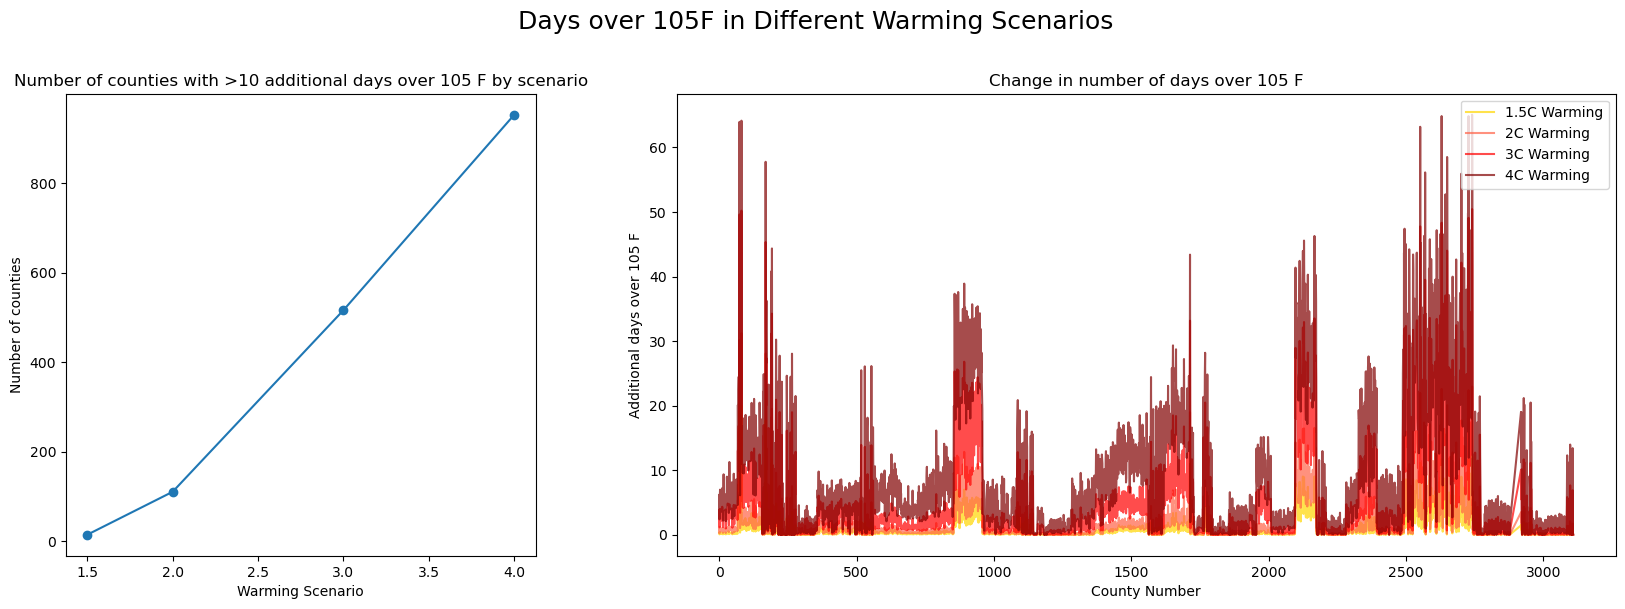

In [146]:
# Create a figure
fig, axes = plt.subplots(1, 2, figsize=(20, 6), gridspec_kw={'width_ratios': [1, 2]})

# First Plot: Line plot across scenarios
ax1 = axes[0]
x = df_scenario_and_over_105['Scenario']
y = df_scenario_and_over_105['Number of counties with more than 10 additional days over 105 degrees F']
ax1.plot(x, y, marker='o')

ax1.set_title('Number of counties with >10 additional days over 105 F by scenario')
ax1.set_xlabel('Warming Scenario')
ax1.set_ylabel('Number of counties')

# Second Plot: County-level data line plot
ax2 = axes[1]
ax2.plot(df_1['Temp Days 105 F'], color='gold', label='1.5C Warming', alpha=0.7)
ax2.plot(df_2['Temp Days 105 F'], color='tomato', label='2C Warming', alpha=0.7)
ax2.plot(df_3['Temp Days 105 F'], color='red', label='3C Warming', alpha=0.7)
ax2.plot(df_4['Temp Days 105 F'], color='maroon', label='4C Warming', alpha=0.7)

ax2.set_title('Change in number of days over 105 F')
ax2.set_xlabel('County Number')
ax2.set_ylabel('Additional days over 105 F')
ax2.legend()
ax2.legend(loc='upper right')

plt.suptitle('Days over 105F in Different Warming Scenarios', fontsize=18, y=1.02)

plt.show()

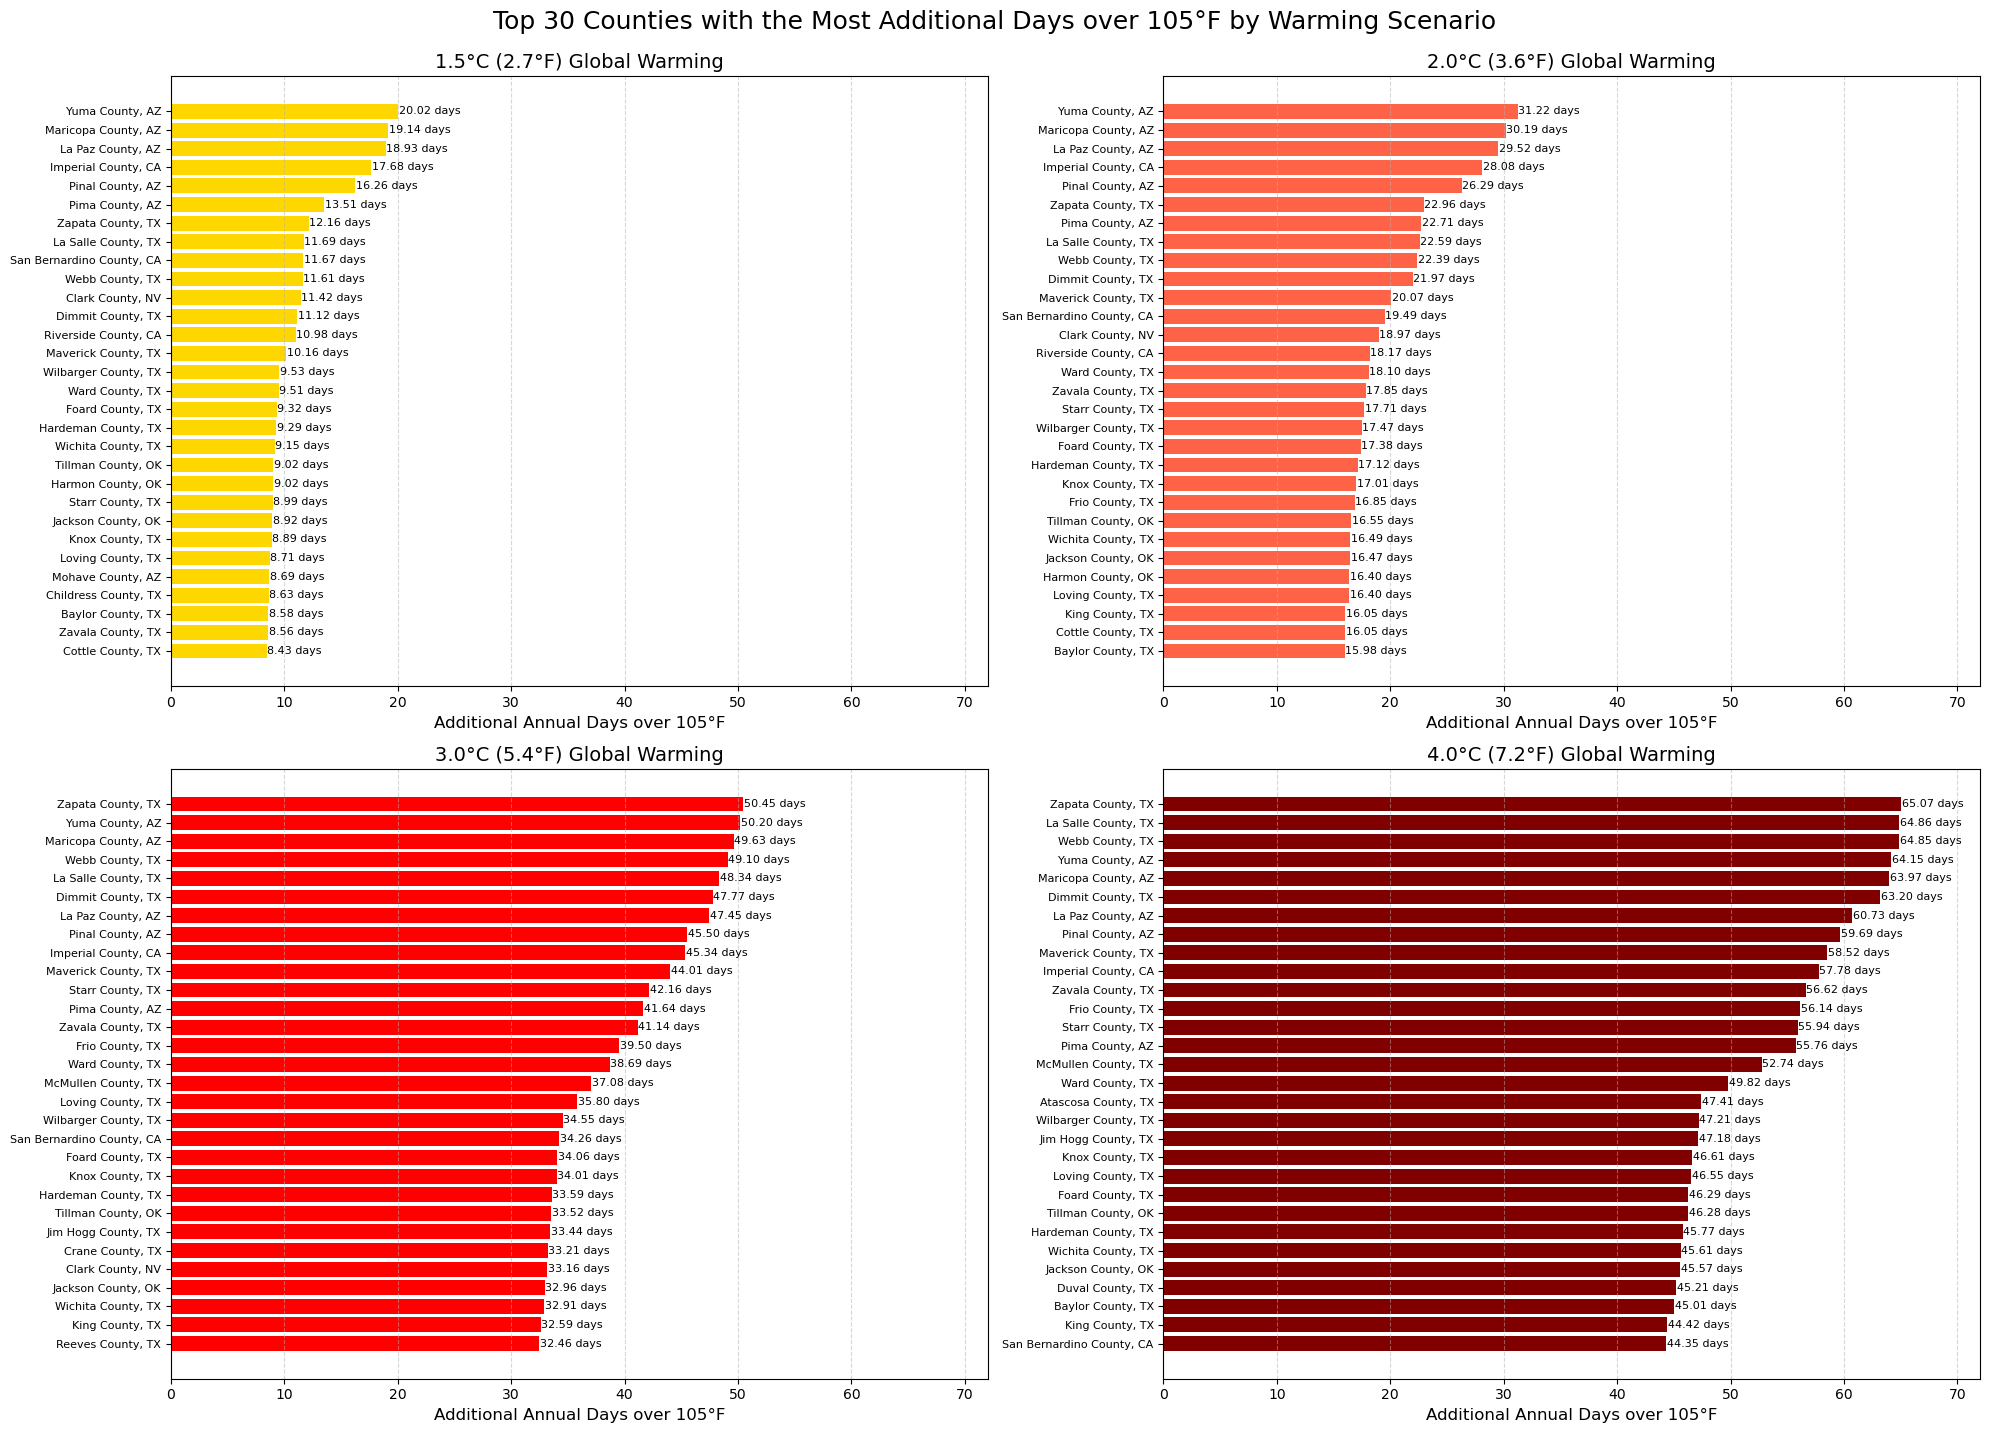

In [147]:
# Prepare data for each scenario
dfs = [df_1, df_2, df_3, df_4]
titles = ['1.5°C (2.7°F) Global Warming', '2.0°C (3.6°F) Global Warming', '3.0°C (5.4°F) Global Warming', '4.0°C (7.2°F) Global Warming']
colors = ['gold', 'tomato', 'red', 'maroon']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
axes = axes.flatten() 

for i, (df, title, color) in enumerate(zip(dfs, titles, colors)):
    # Get top 30 counties and show them in order of showing at the top
    df_top30 = df.nlargest(30, 'Temp Days 105 F').dropna()[["Temp Days 105 F", "county_and_state"]]
    # Display them so the largest are at the top
    df_top30 = df_top30.iloc[::-1]
    
    # Create plots
    ax = axes[i]
    bars = ax.barh(df_top30['county_and_state'], df_top30['Temp Days 105 F'], color=color)

    # Add bar labels
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
                f'{width:.2f} days', va='center', fontsize=8)

    # Set up chart
    ax.set_xlim(0, 72)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Additional Annual Days over 105°F', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', labelsize=8)

# Layout
plt.tight_layout()
plt.suptitle('Top 30 Counties with the Most Additional Days over 105°F by Warming Scenario', fontsize=18, y=1.02)

plt.show()

### Mapping Change in extremely hot days at 2°C global warming

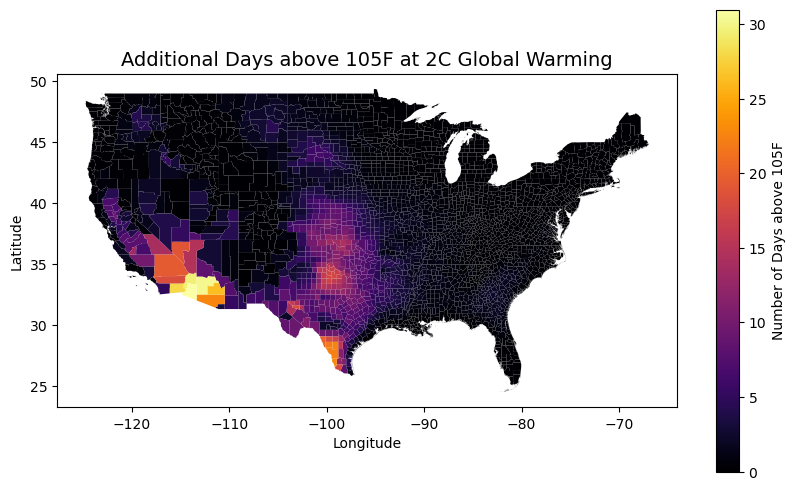

In [156]:
# Plot the map
fig, ax = plt.subplots(figsize=(10, 6))
two_us.plot(column='tmax_days_ge_105f_GWL2',
         cmap='inferno',
         norm=colors.Normalize(vmin=0, vmax=31),
         ax=ax)

# Create colorbar
sm = plt.cm.ScalarMappable(cmap='inferno', norm=colors.Normalize(vmin=0, vmax=31))
sm._A = [] 
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Number of Days above 105F')

# Add axis labels and title
ax.set_title("Additional Days above 105F at 2C Global Warming", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()